<a href="https://colab.research.google.com/github/Pawan12345kr/AspireNex/blob/main/Movie_Genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : **Pawan Kumar**

---
Email : **pawan8271kr@gmail.com**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Exploration**

In [5]:
# Loading the Datasets
import re
train_data = open('/content/drive/MyDrive/Machine-learning-dataset/Genre Classification Dataset/train_data.txt').read()
a = []
for row in re.split('\n',train_data):
    a.append(re.split(' ::: ',row))

In [7]:
import pandas as pd
import numpy as np

In [9]:
train_data = pd.read_csv('/content/drive/MyDrive/Machine-learning-dataset/Genre Classification Dataset/train_data.txt',sep=' ::: ',header=None,engine='python', names=['Title','Genre','Description'])
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [10]:
test_data = pd.read_csv('/content/drive/MyDrive/Machine-learning-dataset/Genre Classification Dataset/test_data.txt',sep=' ::: ',header=None,engine='python', names=['Title','Description'])
test_data

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
5,Er nu zhai (1955),Before he was known internationally as a marti...
...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Dar..."
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their ...
54198,Oliver Twink (2007),"A movie 169 years in the making. Oliver Twist,..."
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard ..."


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [12]:
# This Dataset has only Categorical column, the summary statistics will be count, unique, top, frequency
train_data.describe(include='object')

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy o...
freq,1,13613,12


In [13]:
train_data['Genre'].value_counts()

Genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64

In [14]:
print("Total rows {} | Total Columns {}".format(train_data.shape[0],train_data.shape[1]))

Total rows 54214 | Total Columns 3


In [15]:
# No Null Values
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

# **Data Visualization**

<Axes: xlabel='Genre'>

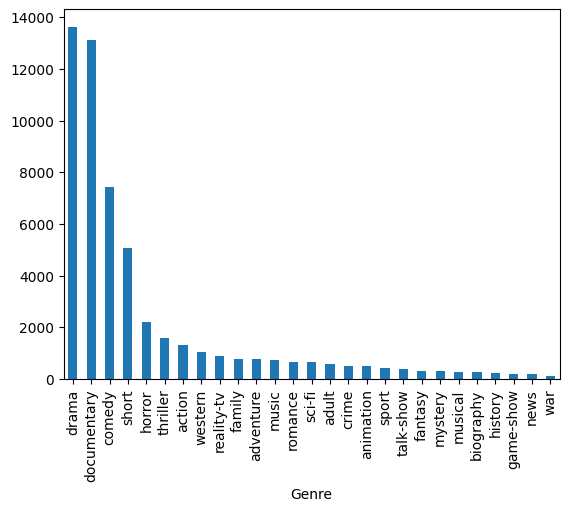

In [16]:
#Visualize the Data
# Check the Genre Category counts
train_data['Genre'].value_counts().plot(kind='bar')

<Figure size 2000x1000 with 0 Axes>

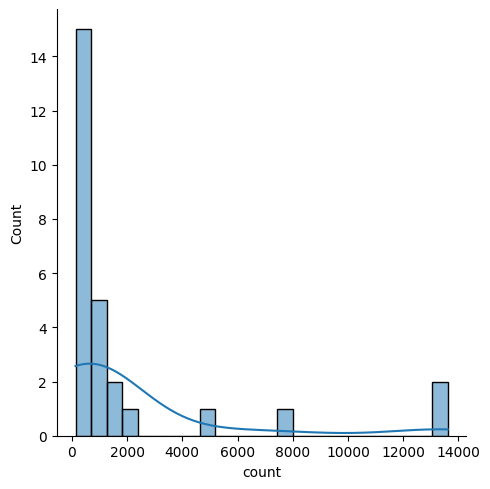

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
Genre = train_data['Genre'].value_counts().to_frame()
sns.displot(x=Genre['count'],data=Genre,kde=True);

In [21]:
mean = Genre.mean()
std = Genre.std()
median = Genre.median()

In [22]:
from scipy.stats import norm
pdf = norm.pdf(Genre['count'],mean,std)
pdf

array([6.79566522e-07, 1.05814890e-06, 3.58854579e-05, 7.68865980e-05,
       1.09450170e-04, 1.08892327e-04, 1.07640609e-04, 1.05738837e-04,
       1.04505780e-04, 1.03583779e-04, 1.03497367e-04, 1.03066872e-04,
       1.02468920e-04, 1.02208496e-04, 1.01599278e-04, 1.00651670e-04,
       1.00571582e-04, 9.98014425e-05, 9.93095501e-05, 9.84715160e-05,
       9.84213708e-05, 9.78892473e-05, 9.77353507e-05, 9.74510837e-05,
       9.68081990e-05, 9.66354109e-05, 9.59758945e-05])

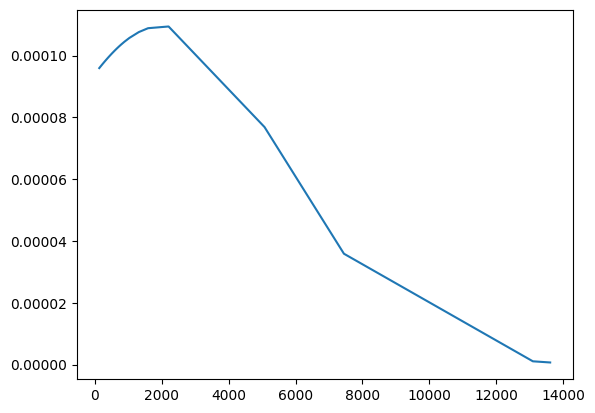

In [23]:
# plotting the Distribution
plt.plot(Genre['count'], norm.pdf(Genre['count'],mean,std),label='μ: {}, σ: {}'.format(str(mean),str(std)))

# **Data Preprocessing**

In [24]:
# Changing Descritpion column to lowercase, to clean and normalize all the text
train_data['Description'] = train_data['Description'].str.lower().copy()

In [25]:
train_data_clean = train_data.copy()

In [26]:
# Find any at sign(@) is used and followed by any word
def atSignRemove(x):
    x = re.sub('[@,<,?,&,*,#,%,]+\w+', '',x)
    return x
train_data_clean['Description'] = train_data_clean['Description'].apply(atSignRemove)
train_data_clean

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...
2,Cupid (1997),thriller,a brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,to help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,the film's title refers not only to the un-rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,this short-lived nbc live sitcom centered on b...
54211,Dead Girls Don't Cry (????),horror,the next generation of exploitation. the siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"ze bestaan echt, is a stand-up comedy about gr..."
54213,Make Your Own Bed (1944),comedy,walter and vivian live in the country and have...


In [27]:
def removeLinks(x):
    x = re.sub(r'http\S+', '', x)
    return x
train_data_clean['Description'] = train_data_clean['Description'].apply(removeLinks)
train_data_clean

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...
2,Cupid (1997),thriller,a brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,to help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,the film's title refers not only to the un-rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,this short-lived nbc live sitcom centered on b...
54211,Dead Girls Don't Cry (????),horror,the next generation of exploitation. the siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"ze bestaan echt, is a stand-up comedy about gr..."
54213,Make Your Own Bed (1944),comedy,walter and vivian live in the country and have...


In [28]:
def charactersAlone(x):
    x = re.sub(r"[^a-zA-Z+']", ' ', x)
    return x
train_data_clean['Description'] = train_data_clean['Description'].apply(charactersAlone)
train_data_clean

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...
2,Cupid (1997),thriller,a brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,to help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,the film's title refers not only to the un rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,this short lived nbc live sitcom centered on b...
54211,Dead Girls Don't Cry (????),horror,the next generation of exploitation the siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,ze bestaan echt is a stand up comedy about gr...
54213,Make Your Own Bed (1944),comedy,walter and vivian live in the country and have...


In [29]:
import string
string.punctuation
def avoidPunctuation(x):
    x = "".join([i for i in x if i not in string.punctuation])
    return x
train_data_clean['Description'] = train_data_clean['Description'].apply(avoidPunctuation)
train_data_clean

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...
2,Cupid (1997),thriller,a brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,to help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,the films title refers not only to the un reco...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,this short lived nbc live sitcom centered on b...
54211,Dead Girls Don't Cry (????),horror,the next generation of exploitation the siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,ze bestaan echt is a stand up comedy about gr...
54213,Make Your Own Bed (1944),comedy,walter and vivian live in the country and have...


In [30]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [31]:
# Now preparing the Dataset for model Training
import nltk
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens
train_data_clean['Description'] = train_data_clean['Description'].apply(lambda x : tokenize(x))
train_data_clean

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,"[listening, in, to, a, conversation, between, ..."
2,Cupid (1997),thriller,"[a, brother, and, sister, with, a, past, inces..."
3,"Young, Wild and Wonderful (1980)",adult,"[as, the, bus, empties, the, students, for, th..."
4,The Secret Sin (1915),drama,"[to, help, their, unemployed, father, make, en..."
5,The Unrecovered (2007),drama,"[the, films, title, refers, not, only, to, the..."
...,...,...,...
54210,"""Bonino"" (1953)",comedy,"[this, short, lived, nbc, live, sitcom, center..."
54211,Dead Girls Don't Cry (????),horror,"[the, next, generation, of, exploitation, the,..."
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"[ze, bestaan, echt, is, a, stand, up, comedy, ..."
54213,Make Your Own Bed (1944),comedy,"[walter, and, vivian, live, in, the, country, ..."


In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
# Removing Stop Words
import nltk.corpus
stopwords = nltk.corpus.stopwords.words("english")
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text
train_data_clean['Description'] = train_data_clean['Description'].apply(lambda x : remove_stopwords(x))
train_data_clean

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,"[listening, conversation, doctor, parents, yea..."
2,Cupid (1997),thriller,"[brother, sister, past, incestuous, relationsh..."
3,"Young, Wild and Wonderful (1980)",adult,"[bus, empties, students, field, trip, museum, ..."
4,The Secret Sin (1915),drama,"[help, unemployed, father, make, ends, meet, e..."
5,The Unrecovered (2007),drama,"[films, title, refers, un, recovered, bodies, ..."
...,...,...,...
54210,"""Bonino"" (1953)",comedy,"[short, lived, nbc, live, sitcom, centered, bo..."
54211,Dead Girls Don't Cry (????),horror,"[next, generation, exploitation, sisters, kapa..."
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"[ze, bestaan, echt, stand, comedy, growing, fa..."
54213,Make Your Own Bed (1944),comedy,"[walter, vivian, live, country, difficult, tim..."


In [37]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [38]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...


In [39]:
lem = nltk.WordNetLemmatizer()

In [40]:
def lemmatizing(tokenized_text):
    text = [lem.lemmatize(word) for word in tokenized_text]
    text=' '.join(text)
    return text
train_data_clean['lemmetized'] = train_data_clean['Description'].apply(lambda x : lemmatizing(x))
train_data_clean

,Title,Genre,Description,lemmetized
1,Oscar et la dame rose (2009),drama,"[listening, conversation, doctor, parents, yea...",listening conversation doctor parent year old ...
2,Cupid (1997),thriller,"[brother, sister, past, incestuous, relationsh...",brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,"[bus, empties, students, field, trip, museum, ...",bus empty student field trip museum natural hi...
4,The Secret Sin (1915),drama,"[help, unemployed, father, make, ends, meet, e...",help unemployed father make end meet edith twi...
5,The Unrecovered (2007),drama,"[films, title, refers, un, recovered, bodies, ...",film title refers un recovered body ground zer...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,"[short, lived, nbc, live, sitcom, centered, bo...",short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,"[next, generation, exploitation, sisters, kapa...",next generation exploitation sister kapa bay s...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"[ze, bestaan, echt, stand, comedy, growing, fa...",ze bestaan echt stand comedy growing facing fe...
54213,Make Your Own Bed (1944),comedy,"[walter, vivian, live, country, difficult, tim...",walter vivian live country difficult time keep...


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect =TfidfVectorizer()
tfidf_vect

TfidfVectorizer()

In [42]:
X_tfidf = tfidf_vect.fit_transform(train_data_clean['lemmetized'])
X_tfidf

<54214x113791 sparse matrix of type '<class 'numpy.float64'>'
	with 2621164 stored elements in Compressed Sparse Row format>

In [43]:
# If we Check the Columns, now its been vectorized with n number of columns
X_tfidf.shape

(54214, 113791)

In [44]:
# Naive Bayes Classifier
y = train_data_clean['Genre']
y

1              drama
2           thriller
3              adult
4              drama
5              drama
            ...     
54210         comedy
54211         horror
54212    documentary
54213         comedy
54214        history
Name: Genre, Length: 54214, dtype: object

# **Modelling**

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,test_size=0.3,random_state=2)

In [47]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
y_pred_train

array(['drama', 'documentary', 'drama', ..., 'drama', 'drama',
       'documentary'], dtype='<U11')

In [48]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_train,y_pred_train)
accuracy

0.4657039711191336

In [49]:
y_pred_test = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_test)
accuracy

0.43578235474946203

In [50]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(max_iter=1000)
clf1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
y_pred_train2 = clf1.predict(X_train)
y_pred_test2 = clf1.predict(X_test)
accuracy = accuracy_score(y_train,y_pred_train2)
accuracy

0.7171730480381565

In [52]:
y_pred_test2 = clf1.predict(X_test)
accuracy1 = accuracy_score(y_test,y_pred_test2)
accuracy1

0.574239163848755

In [53]:
# For Out Samples Method accuracy is
Evaluation = pd.DataFrame({'Naive Bayes Model': [accuracy],
                           'Logistic Regression Model':[accuracy1]}, index=['Accuracy'])
Evaluation

,Naive Bayes Model,Logistic Regression Model
Accuracy,0.717173,0.574239


In [54]:
# Clean the Samples as we did in the Train Samples
test_data = pd.read_csv('/content/drive/MyDrive/Machine-learning-dataset/Genre Classification Dataset/test_data.txt',sep = ' ::: ',header=None,engine='python',names=['Title','Genre','Description'])

In [55]:
#Clean the Dataset
def cleansing(x):
    x = x.lower()
    x = re.sub('[@,<,?,&,*,#,%,]+\w+', '',x)
    x = re.sub(r'http\S+', '', x)
    x = re.sub(r"[^a-zA-Z+']", ' ', x)
    x = "".join([i for i in x if i not in string.punctuation])
    #words = nltk.word_tokenize(text)
    words = re.split('\W+', x)
    stopwords = nltk.corpus.stopwords.words('english')
    x = [word for word in words if word not in stopwords]
    return x


test_data['Text_cleaning'] = test_data['Description'].apply(lambda x: cleansing(x))
test_data

,Title,Genre,Description,Text_cleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart...","[l, r, brane, loves, life, car, apartment, job..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi...","[spain, march, quico, naughty, child, three, b..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...,"[one, year, life, albin, family, shepherds, no..."
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his...","[father, died, hasnt, spoken, brother, years, ..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...,"[known, internationally, martial, arts, supers..."
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Dar...","[covering, multiple, genres, tales, light, dar..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their ...,"[alice, cora, munro, attempt, find, father, br..."
54197,54198,Oliver Twink (2007),"A movie 169 years in the making. Oliver Twist,...","[movie, years, making, oliver, twist, artful, ..."
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard ...","[popular, mysterious, rock, j, mike, mallard, ..."


In [56]:
# Lemmetizing the Test Data
def lemmatizing(tokenized):
    text = [lem.lemmatize(word) for word in tokenized]
    text=' '.join(text)
    return text
test_data['lemmatized'] = test_data['Text_cleaning'].apply(lambda x : lemmatizing(x))
test_data

,Title,Genre,Description,Text_cleaning,lemmatized
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart...","[l, r, brane, loves, life, car, apartment, job...",l r brane love life car apartment job especial...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi...","[spain, march, quico, naughty, child, three, b...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...,"[one, year, life, albin, family, shepherds, no...",one year life albin family shepherd north tran...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his...","[father, died, hasnt, spoken, brother, years, ...",father died hasnt spoken brother year serious ...
4,5,Er nu zhai (1955),Before he was known internationally as a marti...,"[known, internationally, martial, arts, supers...",known internationally martial art superstar br...
...,...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Dar...","[covering, multiple, genres, tales, light, dar...",covering multiple genre tale light dark anthol...
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their ...,"[alice, cora, munro, attempt, find, father, br...",alice cora munro attempt find father british o...
54197,54198,Oliver Twink (2007),"A movie 169 years in the making. Oliver Twist,...","[movie, years, making, oliver, twist, artful, ...",movie year making oliver twist artful dodger f...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard ...","[popular, mysterious, rock, j, mike, mallard, ...",popular mysterious rock j mike mallard askew b...


In [57]:
#Vecotrizing

X_tfidf_test = tfidf_vect.transform(test_data['lemmatized'])
X_tfidf_test

<54200x113791 sparse matrix of type '<class 'numpy.float64'>'
	with 2562247 stored elements in Compressed Sparse Row format>

In [58]:
X_tfidf_test.shape

(54200, 113791)

In [59]:
#Predictions with Naive Bayes Classifier
y_test_solution = clf.predict(X_tfidf_test)
y_test_solution

array(['drama', 'drama', 'documentary', ..., 'drama', 'drama',
       'documentary'], dtype='<U11')

In [60]:
# Clean the Samples as we did in the Train Samples
test_data_solution = pd.read_csv('/content/drive/MyDrive/Machine-learning-dataset/Genre Classification Dataset/test_data_solution.txt',sep = ' ::: ',header=None,engine='python',names=['Title','Genre','Description'])
test_data_solution

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
5,Er nu zhai (1955),drama,Before he was known internationally as a marti...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Dar..."
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their ...
54198,Oliver Twink (2007),adult,"A movie 169 years in the making. Oliver Twist,..."
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard ..."


In [61]:
accuracy_solution = accuracy_score(test_data_solution['Genre'],y_test_solution)
accuracy_solution

0.43865313653136534

In [62]:
y_test_solution1 = clf1.predict(X_tfidf_test)
y_test_solution1

array(['drama', 'drama', 'documentary', ..., 'drama', 'drama',
       'documentary'], dtype=object)

In [63]:
accuracy_solution1 = accuracy_score(test_data_solution['Genre'],y_test_solution1)
accuracy_solution1

0.5762546125461254